<a href="https://colab.research.google.com/github/neuromatch/course-content-template/blob/main/tutorials/W1D2_Template/W1D2_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/course-content-template/main/tutorials/W1D2_Template/W1D2_Tutorial1.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 2: Continual Learning

**Week 2, Day 4: Macro-Learning**

**By Neuromatch Academy**

__Content creators:__ Hlib Solodzhuk, Ximeng Mao, Grace Lindsay

__Content reviewers:__ Names & Surnames

__Production editors:__ Names & Surnames

<br>

Acknowledgments: [ACKNOWLEDGMENT_INFORMATION]


___


# Tutorial Objectives

*Estimated timing of tutorial: 25 minutes*

In this tutorial, you will observe how simply further training on new data/tasks causes forgetting of past task. You will also explore how different learning schedules impact performance.



In [1]:
# @title Tutorial slides

# @markdown These are the slides for the videos in all tutorials today


## Uncomment the code below to test your function

#from IPython.display import IFrame
#link_id = "<YOUR_LINK_ID_HERE>"

# print("If you want to download the slides: 'Link to the slides'")
      # Example: https://osf.io/download/{link_id}/

#IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{link_id}/?direct%26mode=render", width=854, height=480)

---
# Setup



In [2]:
# @title Install and import feedback gadget

# !pip3 install vibecheck datatops --quiet

# from vibecheck import DatatopsContentReviewContainer
# def content_review(notebook_section: str):
#     return DatatopsContentReviewContainer(
#         "",  # No text prompt - leave this as is
#         notebook_section,
#         {
#             "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
#             "name": "sciencematch_sm", # change the name of the course : neuromatch_dl, climatematch_ct, etc
#             "user_key": "y1x3mpx5",
#         },
#     ).render()

# feedback_prefix = "W2D4_T2"

In [3]:
# Imports

# working with data
import numpy as np 

# plotting
import matplotlib.pyplot as plt
import logging

# interactive display
import ipywidgets as widgets

# modeling
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [4]:
# @title Figure settings

logging.getLogger('matplotlib.font_manager').disabled = True

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # perfrom high definition rendering for images and plots
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [5]:
# @title Plotting functions

def plot_summer_autumn_predictions(summer_predictions, autumn_predictions):
    """
    Plots the true data (summer and autumn prices) along with the predicted summer and autumn prices using a scatter plot.

    Inputs:
        - summer_predictions (numpy.ndarray): Array containing the predicted prices for the summer season.
        - autumn_predictions (numpy.ndarray): Array containing the predicted prices for the autumn season.
    """

    with plt.xkcd():
      plt.plot(np.append(summer_days, autumn_days), np.append(summer_prices, autumn_prices), label = "True Data")
      plt.scatter(autumn_days_test, autumn_predictions, label = "Autumn Predictions", marker='o', color='g', zorder=2)
      plt.scatter(summer_days_test, summer_predictions, label = "Summer Predictions", marker='o', color='r', zorder=2)
      plt.xlabel('Day')
      plt.ylabel('Price')
      plt.legend()
      plt.show()

def plot_performance(num_epochs, summer_r_squared, autumn_r_squared):
    """
    Plots the R-squared values for the summer and autumn seasons during the training process.

    Inputs:
        - num_epochs (int): The number of training epochs.
        - summer_r_squared (list): List containing the R-squared values for the summer season at each epoch.
        - autumn_r_squared (list): List containing the R-squared values for the autumn season at each epoch.
    """
    
    print(f"Summmer final R-squared value is: {summer_r_squared[-1]:.02f}")
    print(f"Autumn final R-squared value is: {autumn_r_squared[-1]:.02f}")

    
    with plt.xkcd():
      plt.plot(np.arange(num_epochs), summer_r_squared, label = "Summer Fit")
      plt.plot(np.arange(num_epochs), autumn_r_squared, label = "Autumn Fit")
      plt.xlabel('Epoch')
      plt.ylabel('R-squared value')
      plt.legend()
      plt.show()

In [6]:
# @title Set random seed

import random
import numpy as np

def set_seed(seed=None):
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)

set_seed(seed = 42)

In [7]:
# @title Video 1: Continual learning

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_continual_learning")

---

# Section 1: Catastrophic forgetting

In this section we are going to discuss the concept of continual learning and argue that training on new data doesn't provide any guarantees that the model will remember the relationship it was trained on earlier.

## Coding Exercise 1: Fitting new data

Let's assume now that we would like our model to predict not only the summer prices but also the autumn ones. We have already trained the MLP to predict summer months nicely and observed that it performs poorly on the autumn period, let us try to make the model learn the new infromation about the prices and see whether it is able to remember both. (First we will need to train the model on summer days again for this tutorial).


In [8]:
#define variables
A = .005
B = 0.1
phi = 0
C = 1

#define days (observe that those are not 1, ..., 365 but proxy ones to make model function neat)
days = np.arange(-26, 26 + 1/7, 1/7)
prices = A * days**2 + B * np.sin(np.pi * days + phi) + C

#take only summer data for intro-training
summer_days = np.expand_dims(days[151:243], 1)
summer_prices = prices[151:243]

#take autumn data for further training
autumn_days = np.expand_dims(days[243:334], 1)
autumn_prices = prices[243:334]

#divide summer data into train and test sets
summer_days_train, summer_days_test, summer_prices_train, summer_prices_test = train_test_split(summer_days, summer_prices, random_state = 42)

#divide autumn data into train and test sets
autumn_days_train, autumn_days_test, autumn_prices_train, autumn_prices_test = train_test_split(autumn_days, autumn_prices, random_state = 42)

In [9]:
#apply normalization for days (we take parameters for whole summer-autumn period)
days_mean, days_std = np.mean(days[151:334]), np.std(days[151:334])

summer_days_train_norm = (summer_days_train - days_mean) / days_std
summer_days_test_norm = (summer_days_test - days_mean) / days_std

#notice that normalization is taken from summer parameters as obviously model is going to forget old data if we reassign it (by making normalization the same)
autumn_days_train_norm = (autumn_days_train - days_mean) / days_std
autumn_days_test_norm = (autumn_days_test - days_mean) / days_std

#define MLP
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state = 42, solver = "lbfgs") # LBFGS is better to use when there is small amount of data

#train MLP
model.fit(summer_days_train_norm, summer_prices_train)

#evaluate MLP on test data
print(f"R-squared value is: {model.score(summer_days_test_norm, summer_prices_test):.02f}.")

R-squared value is: 0.99.


Now, let's incrementally fit the autumn data to the trained model and follow the R-squared values of summer and autumn data test sets on each of the iterations. In the following code snippet you are requested to complete further training with the `partial_fit` function which allows us to train the existing model on new data. As we iterate through the epochs, we can append new R-squared values for each epoch.

In [ ]:
summer_r_squared = [model.score(summer_days_test_norm, summer_prices_test)]
autumn_r_squared = [model.score(autumn_days_test_norm, autumn_prices_test)]
num_epochs = 10

for _ in range(num_epochs - 1):
    
    ###################################################################
    ## Fill out the following then remove
    raise NotImplementedError("Student exercise: complete partial fit and calculate r-squared values for both summer and autumn data")
    ###################################################################
    
    #fit new data for one epoch
    model.partial_fit(..., ...)

    #calculate r-squared values on test sets
    summer_r_squared.append(model.score(..., ...))
    autumn_r_squared.append(model.score(..., ...))

plot_performance(num_epochs, summer_r_squared, autumn_r_squared)

Summmer final R-squared value is: -3673.39
Autumn final R-squared value is: 1.00


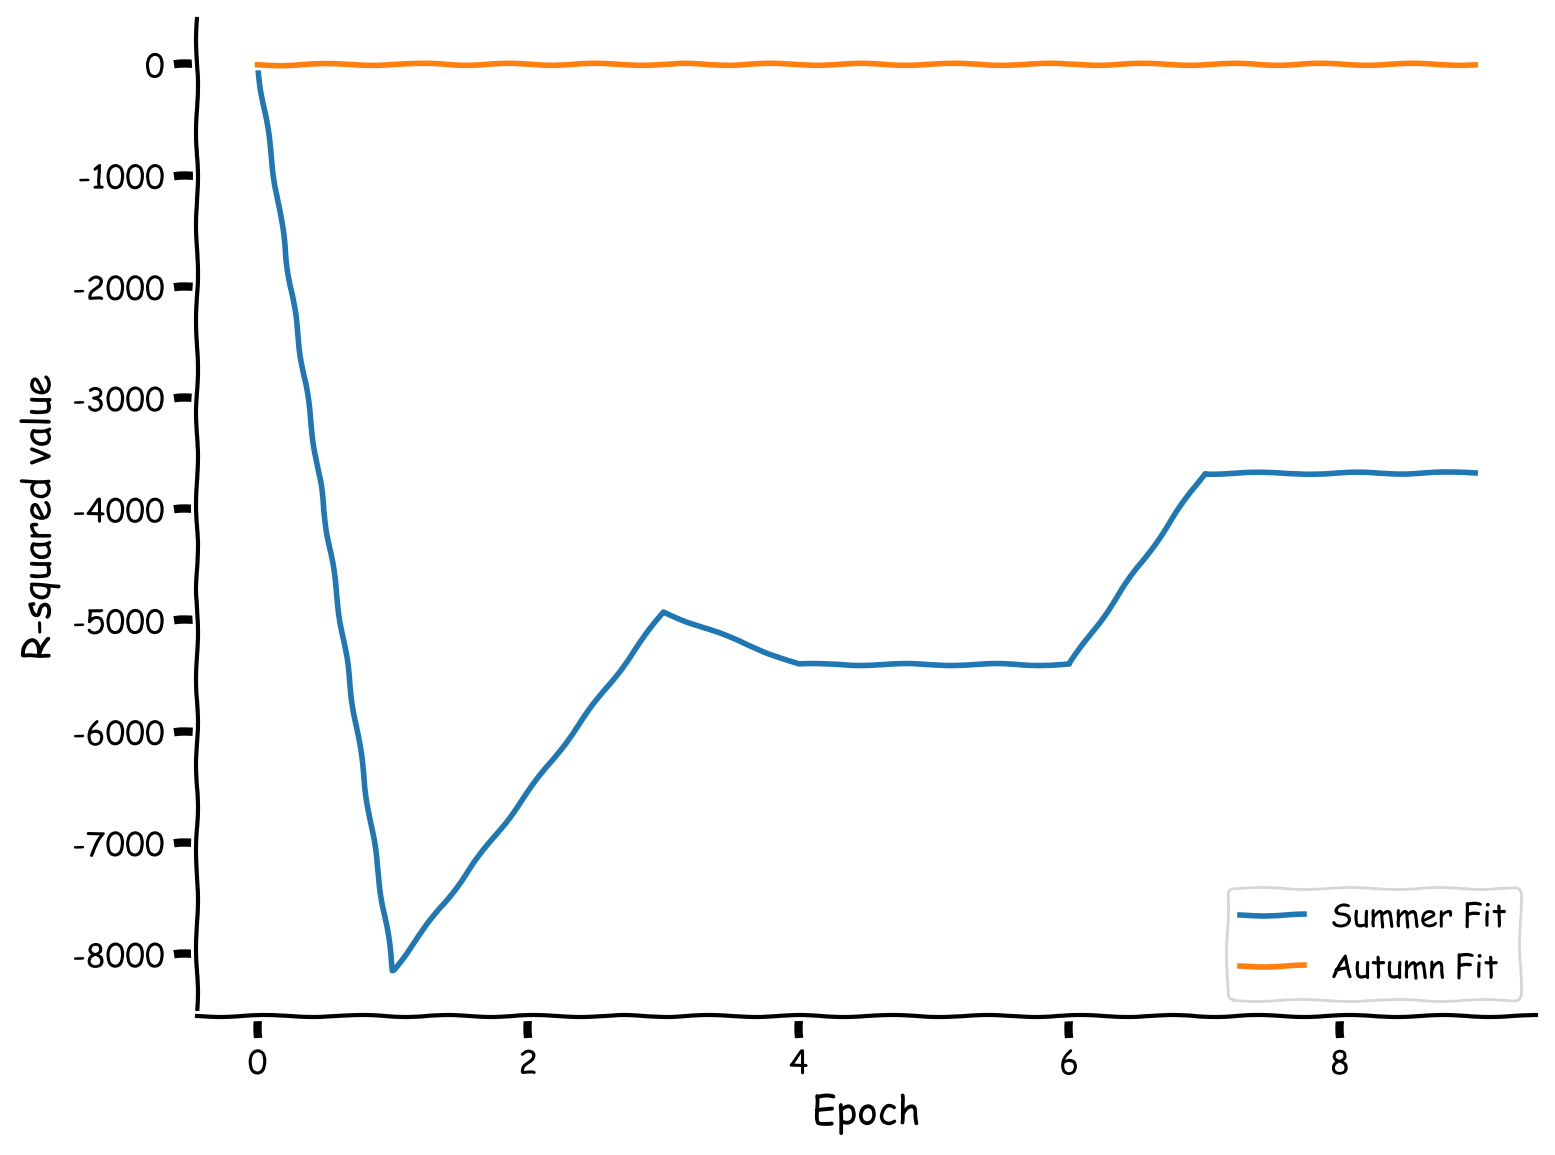

In [10]:
# to_remove solution

summer_r_squared = [model.score(summer_days_test_norm, summer_prices_test)]
autumn_r_squared = [model.score(autumn_days_test_norm, autumn_prices_test)]
num_epochs = 10

for _ in range(num_epochs - 1):
    #fit new data for one epoch
    model.partial_fit(autumn_days_train_norm, autumn_prices_train)

    #calculate r-squared values on test sets
    summer_r_squared.append(model.score(summer_days_test_norm, summer_prices_test))
    autumn_r_squared.append(model.score(autumn_days_test_norm, autumn_prices_test))

plot_performance(num_epochs, summer_r_squared, autumn_r_squared)

Notice how disruptive the change is - even one iteration is enough to change the performance drastically. Let us explore visually the performance of this model on both, summer and autumn, datasets.

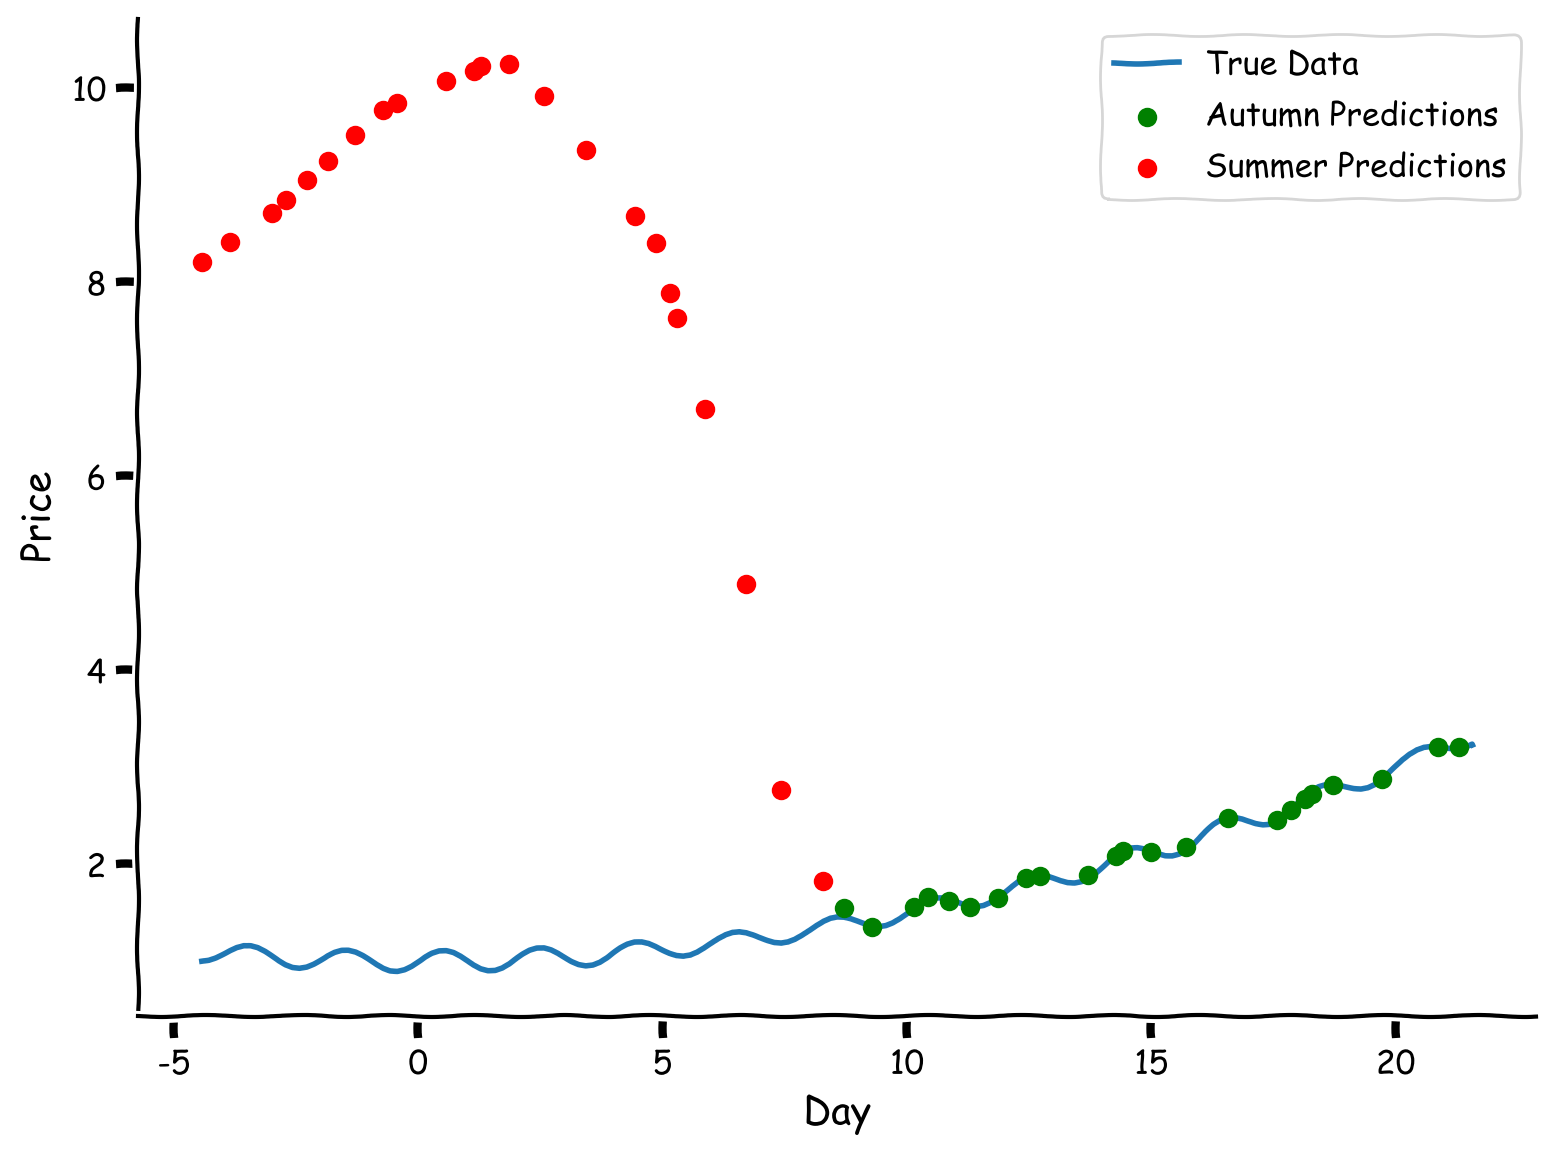

In [11]:
#predict for test sets
summer_prices_predictions = model.predict(summer_days_test_norm)
autumn_prices_predictions = model.predict(autumn_days_test_norm)

plot_summer_autumn_predictions(summer_prices_predictions, autumn_prices_predictions)

The model has learned to perform perfectly on autumn data, while it totally messes up predictions on summer days. Indeed, the model forgot the relation for the old data and lost its predictive power while training on the new dataset. In the next section of the tutorial, we are going to follow the journey - what if instead training sequentially, we make the model to learn it together?

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_fitting_new_data")

---

# Section 2: Joint training

Estimated timing to here from start of tutorial: 10 minutes

In this section we are going to explore whether the joint training on both datasets simultaneously, specified in different formats, improves the predictive performance, thus allowing the model to perform well on summer and autumn.

## Coding Exercise 2a: Sequential joint training

In this coding exercise, let us take a look at the following setup: we will sample $K$ distinct random training examples from summer data and $K$ random examples from autumn, training the model in total on $2K$ examples.

In sequential joint training, epochs of each data type are alternated. So, for example, the first epoch will be the $K$ examples from summer data and then the second will be the $K$ examples from autumn data, then the summer data again, then autumn again and so on.

In the coding exercise please complete partial fits for the corresponding data to implement sequential joint training.

In [ ]:
def sequential_training(K: int, num_epochs: int):
    """
    Perform sequential training for a multi-layer perceptron (MLP) regression model. 
    The function trains the model separately on the summer and autumn data in alternating epochs.

    Inputs:
        - K (int): The number of training examples to sample from each season (summer and autumn) in each epoch.
        - num_epochs (int): The number of training epochs.

    Returns:
        - model (MLPRegressor): The trained MLP regression model.
        - summer_r_squared (list): A list containing the R-squared values for the summer season at each epoch.
        - autumn_r_squared (list): A list containing the R-squared values for the autumn season at each epoch.
    """
    
    model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state = 42, solver = "lbfgs")
    summer_r_squared = []
    autumn_r_squared = []

    for _ in range(num_epochs // 2):
        ###################################################################
        ## Fill out the following then remove
        raise NotImplementedError("Student exercise: sample indices for summer and autumn data and sequentially train on summer and then on autumn data")
        ###################################################################

        #sample random training examples from summer and autumn
        sampled_summer_indices = np.random.choice(np.arange(summer_days_train_norm.shape[0]), size = K, replace = False)
        sampled_autumn_indices = np.random.choice(np.arange(autumn_days_train_norm.shape[0]), size = K, replace = False)

        model.partial_fit(..., ...)
        
        summer_r_squared.append(model.score(summer_days_test_norm, summer_prices_test))
        autumn_r_squared.append(model.score(autumn_days_test_norm, autumn_prices_test))

        model.partial_fit(..., ...)
        
        summer_r_squared.append(model.score(summer_days_test_norm, summer_prices_test))
        autumn_r_squared.append(model.score(autumn_days_test_norm, autumn_prices_test))
        
    return model, summer_r_squared, autumn_r_squared

In [12]:
# to_remove solution

def sequential_training(K: int, num_epochs: int):
    """
    Perform sequential training for a multi-layer perceptron (MLP) regression model. 
    The function trains the model separately on the summer and autumn data in alternating epochs.

    Inputs:
        - K (int): The number of training examples to sample from each season (summer and autumn) in each epoch.
        - num_epochs (int): The number of training epochs.

    Returns:
        - model (MLPRegressor): The trained MLP regression model.
        - summer_r_squared (list): A list containing the R-squared values for the summer season at each epoch.
        - autumn_r_squared (list): A list containing the R-squared values for the autumn season at each epoch.
    """
    
    model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state = 42, solver = "lbfgs")
    summer_r_squared = []
    autumn_r_squared = []

    for _ in range(num_epochs // 2):

        #sample random training examples from summer and autumn
        sampled_summer_indices = np.random.choice(np.arange(summer_days_train_norm.shape[0]), size = K, replace = False)
        sampled_autumn_indices = np.random.choice(np.arange(autumn_days_train_norm.shape[0]), size = K, replace = False)

        model.partial_fit(summer_days_train_norm[sampled_summer_indices], summer_prices_train[sampled_summer_indices])
        
        summer_r_squared.append(model.score(summer_days_test_norm, summer_prices_test))
        autumn_r_squared.append(model.score(autumn_days_test_norm, autumn_prices_test))

        model.partial_fit(autumn_days_train_norm[sampled_autumn_indices], autumn_prices_train[sampled_autumn_indices])
        
        summer_r_squared.append(model.score(summer_days_test_norm, summer_prices_test))
        autumn_r_squared.append(model.score(autumn_days_test_norm, autumn_prices_test))
        
    return model, summer_r_squared, autumn_r_squared

Summmer final R-squared value is: 0.95
Autumn final R-squared value is: 0.99


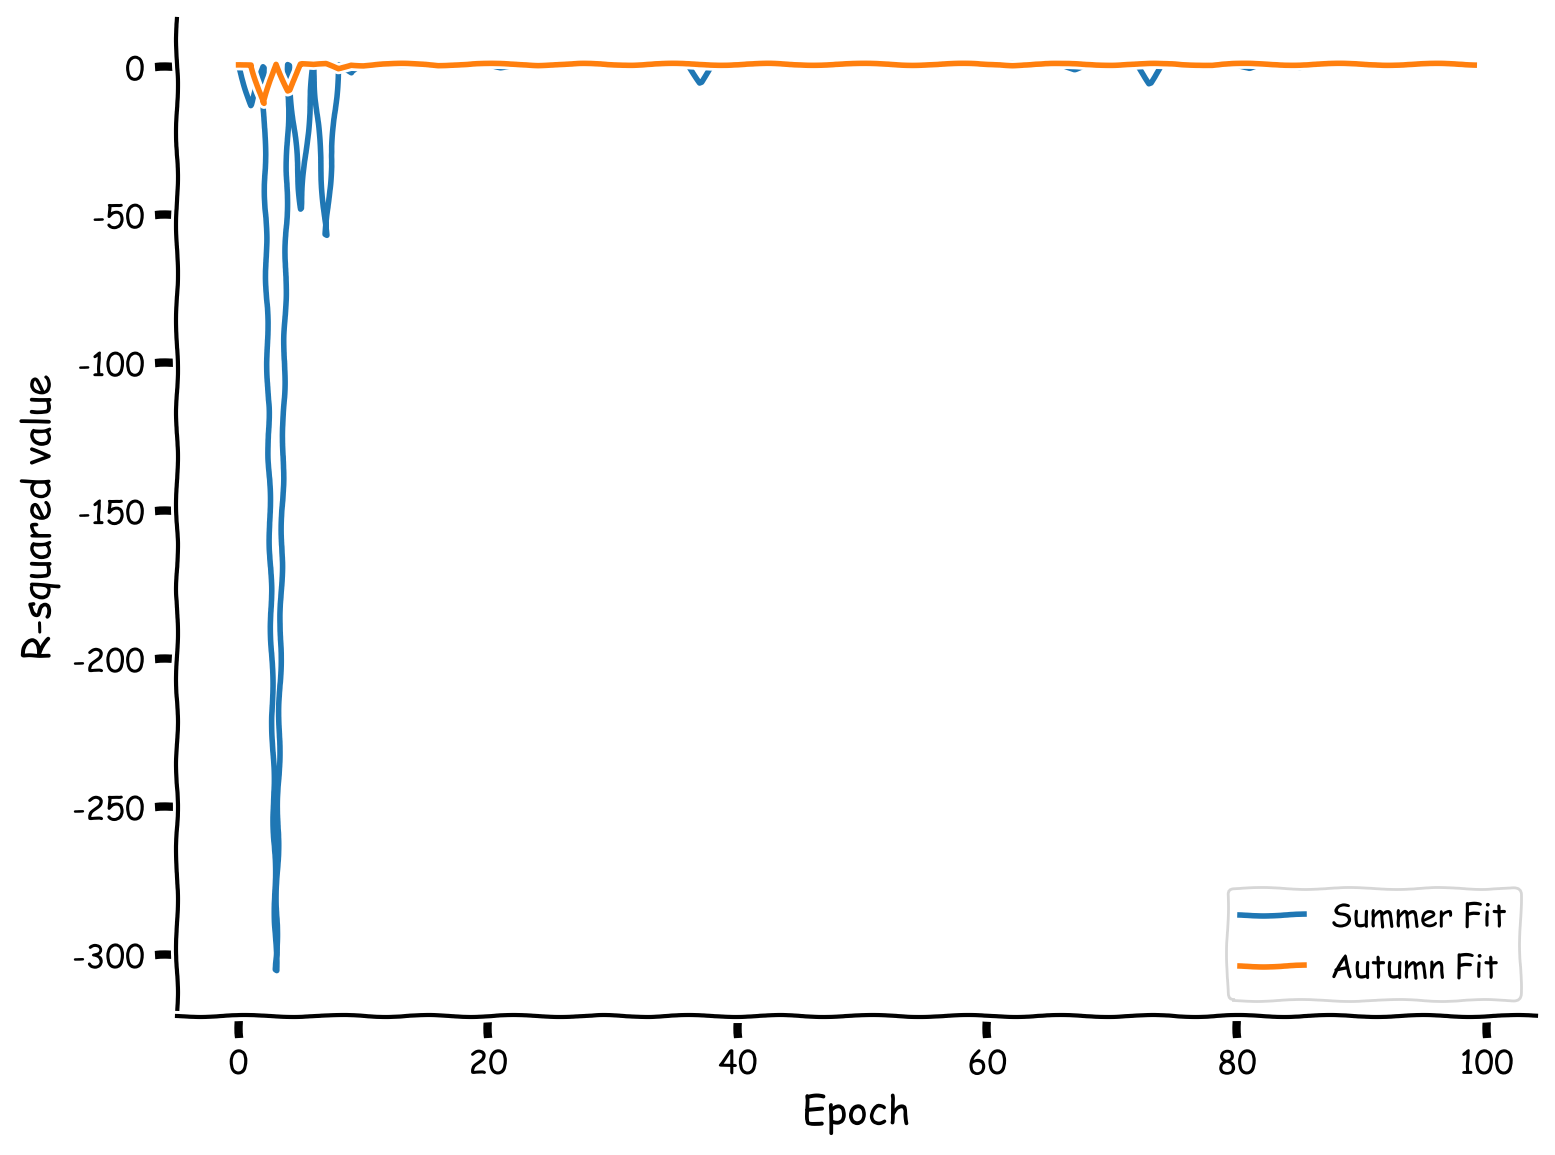

In [13]:
set_seed(42)
num_epochs = 100
K = 30

model, summer_r_squared, autumn_r_squared = sequential_training(K, num_epochs)

plot_performance(num_epochs, summer_r_squared, autumn_r_squared)

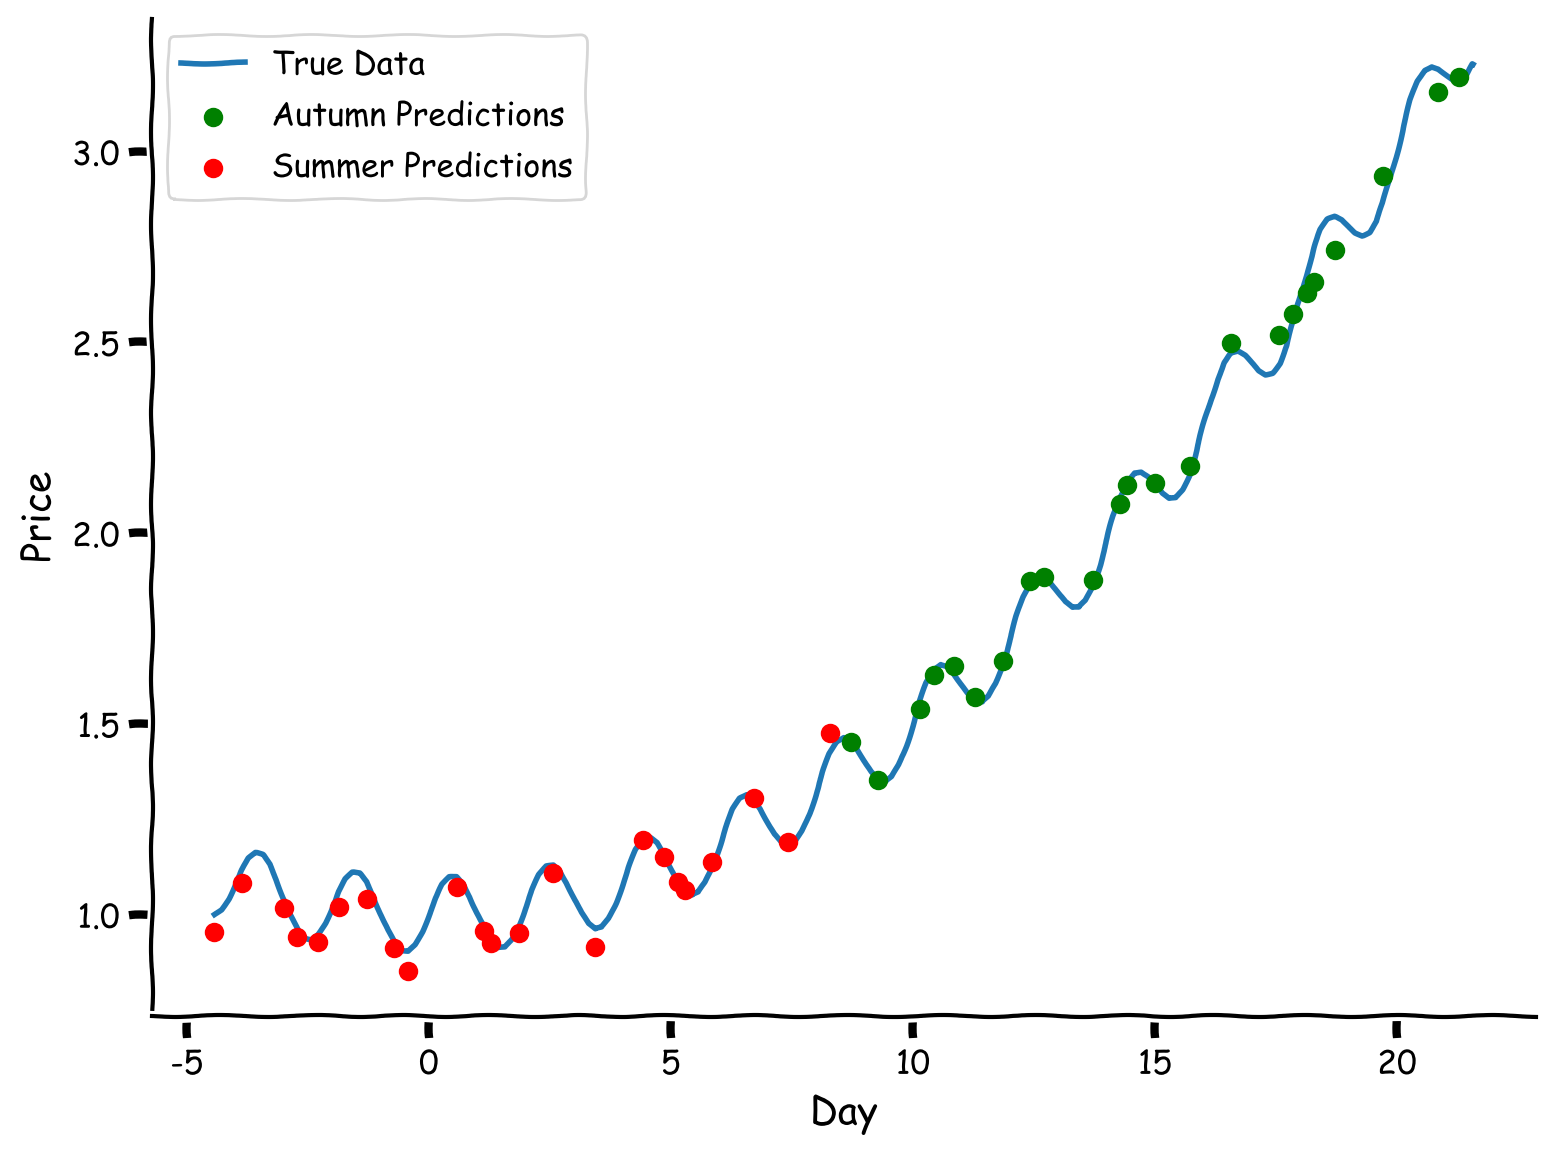

In [14]:
#predict for test sets
summer_prices_predictions = model.predict(summer_days_test_norm)
autumn_prices_predictions = model.predict(autumn_days_test_norm)

plot_summer_autumn_predictions(summer_prices_predictions, autumn_prices_predictions)

As we can see, this performs better than fully learning summer data then learning autumn data.

## Coding Exercise 2b: Interspersed training

Now we will try fully interspersed trainig. As opposed to sequential joint training, here we will generate epochs that contain both summer and autumn data, exposing the model to both sets equally and at the same time. 

We would like you to complete the exercise by filling in the code snippets which correspond to creating the labels for the interspersed epochs and training the model.

In [62]:
def interspersed_training(K: int, num_epochs: int):
    """
    Perform interspersed training for a multi-layer perceptron (MLP) regression model.

    Inputs:
        - K (int): The number of training examples to sample from each season (summer and autumn) in each epoch.
        - num_epochs (int): The number of training epochs.

    Returns:
        - model (MLPRegressor): The trained MLP regression model.
        - summer_r_squared (list): A list containing the R-squared values for the summer season at each epoch.
        - autumn_r_squared (list): A list containing the R-squared values for the autumn season at each epoch.
    """
    
    model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state = 42, solver = "lbfgs")
    summer_r_squared = []
    autumn_r_squared = []

    for _ in range(num_epochs):

        #sample random training examples from summer and autumn
        sampled_summer_indices = np.random.choice(np.arange(summer_days_train_norm.shape[0]), size = K, replace = False)
        sampled_autumn_indices = np.random.choice(np.arange(autumn_days_train_norm.shape[0]), size = K, replace = False)

        
        mixed_days_train = np.expand_dims(np.append(autumn_days_train_norm[sampled_autumn_indices], summer_days_train_norm[sampled_summer_indices]), 1)
        ###################################################################
        ## Fill out the following then remove
        raise NotImplementedError("Student exercise: make price labels for mixed epochs and train")
        ###################################################################
        mixed_prices_train = ...
        model.partial_fit(...,...)
        
        summer_r_squared.append(model.score(summer_days_test_norm, summer_prices_test))
        autumn_r_squared.append(model.score(autumn_days_test_norm, autumn_prices_test))
        
    return model, summer_r_squared, autumn_r_squared

In [15]:
# to_remove solution

def interspersed_training(K: int, num_epochs: int):
    """
    Perform interspersed training for a multi-layer perceptron (MLP) regression model.

    Inputs:
        - K (int): The number of training examples to sample from each season (summer and autumn) in each epoch.
        - num_epochs (int): The number of training epochs.

    Returns:
        - model (MLPRegressor): The trained MLP regression model.
        - summer_r_squared (list): A list containing the R-squared values for the summer season at each epoch.
        - autumn_r_squared (list): A list containing the R-squared values for the autumn season at each epoch.
    """
    
    model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state = 42, solver = "lbfgs")
    summer_r_squared = []
    autumn_r_squared = []
    
    for _ in range(num_epochs):

        #sample random training examples from summer and autumn
        sampled_summer_indices = np.random.choice(np.arange(summer_days_train_norm.shape[0]), size = K, replace = False)
        sampled_autumn_indices = np.random.choice(np.arange(autumn_days_train_norm.shape[0]), size = K, replace = False)

        mixed_days_train = np.expand_dims(np.append(autumn_days_train_norm[sampled_autumn_indices], summer_days_train_norm[sampled_summer_indices]), 1)
        mixed_prices_train = np.append(autumn_prices_train[sampled_autumn_indices], summer_prices_train[sampled_summer_indices])
        model.partial_fit(mixed_days_train,mixed_prices_train)
        
        summer_r_squared.append(model.score(summer_days_test_norm, summer_prices_test))
        autumn_r_squared.append(model.score(autumn_days_test_norm, autumn_prices_test))

    return model, summer_r_squared, autumn_r_squared

Summmer final R-squared value is: 0.99
Autumn final R-squared value is: 1.00


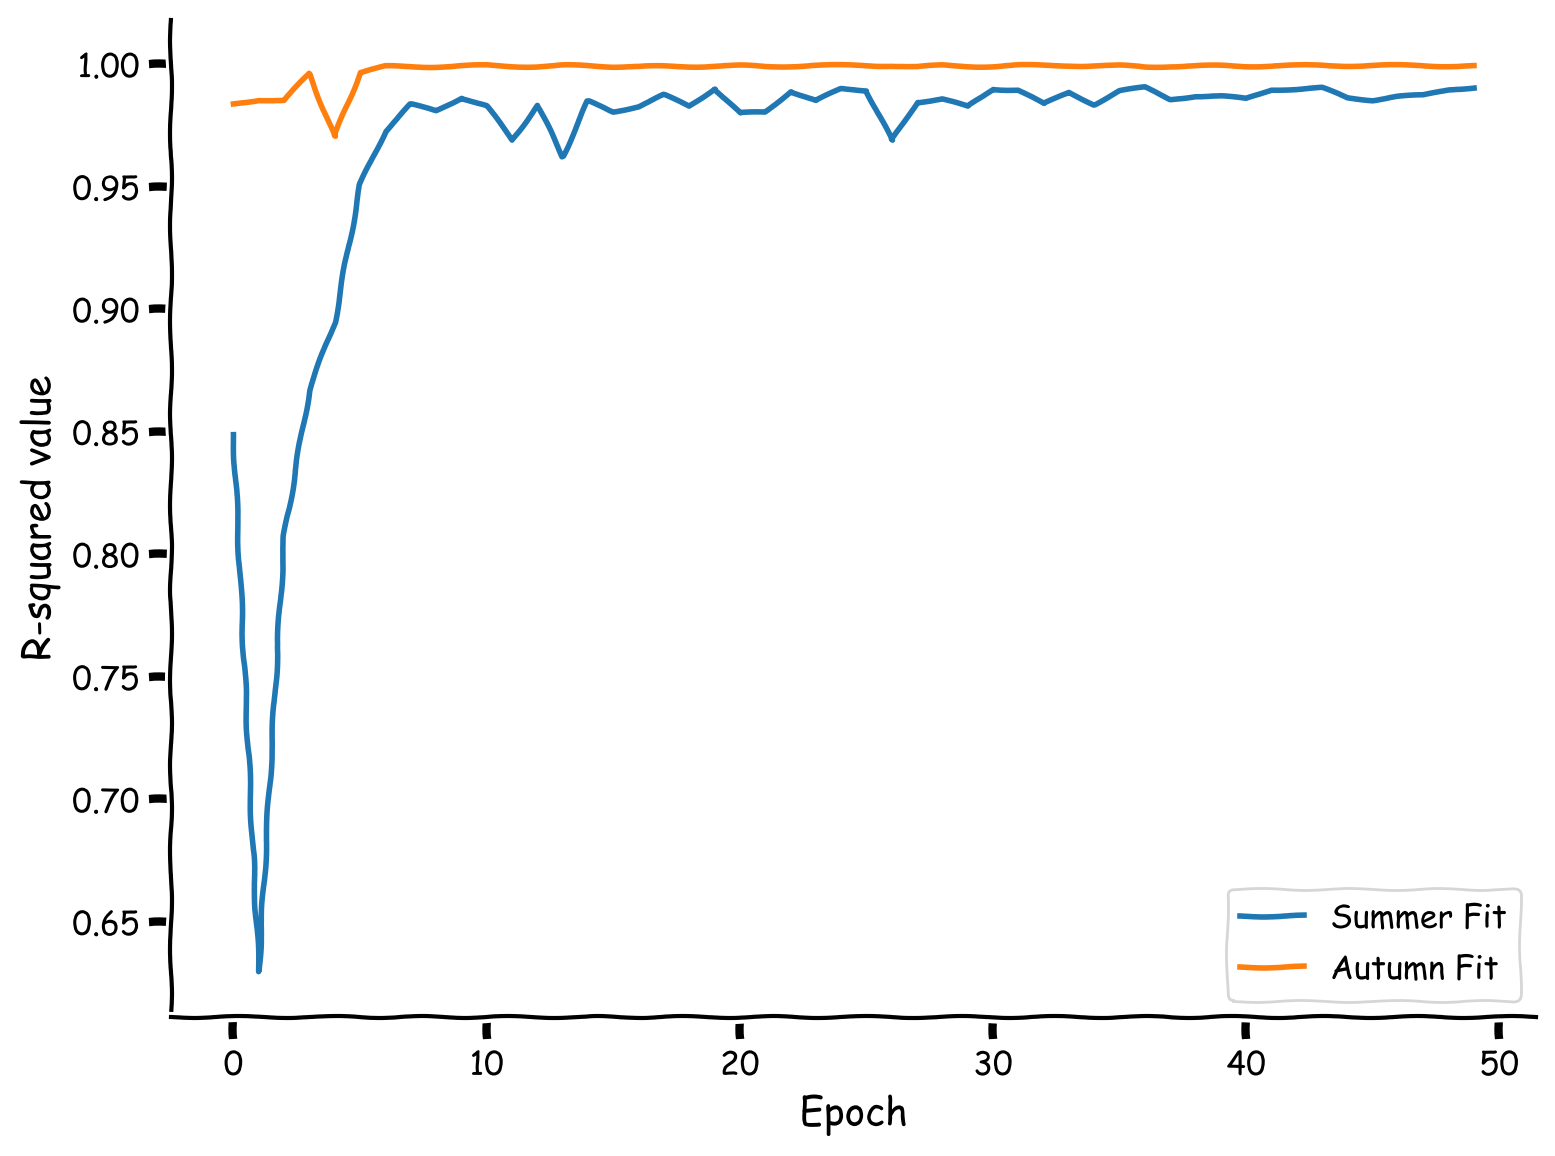

In [16]:
set_seed(42)
num_epochs = 50
K = 30

model, summer_r_squared, autumn_r_squared = interspersed_training(K, num_epochs)

plot_performance(num_epochs, summer_r_squared, autumn_r_squared)

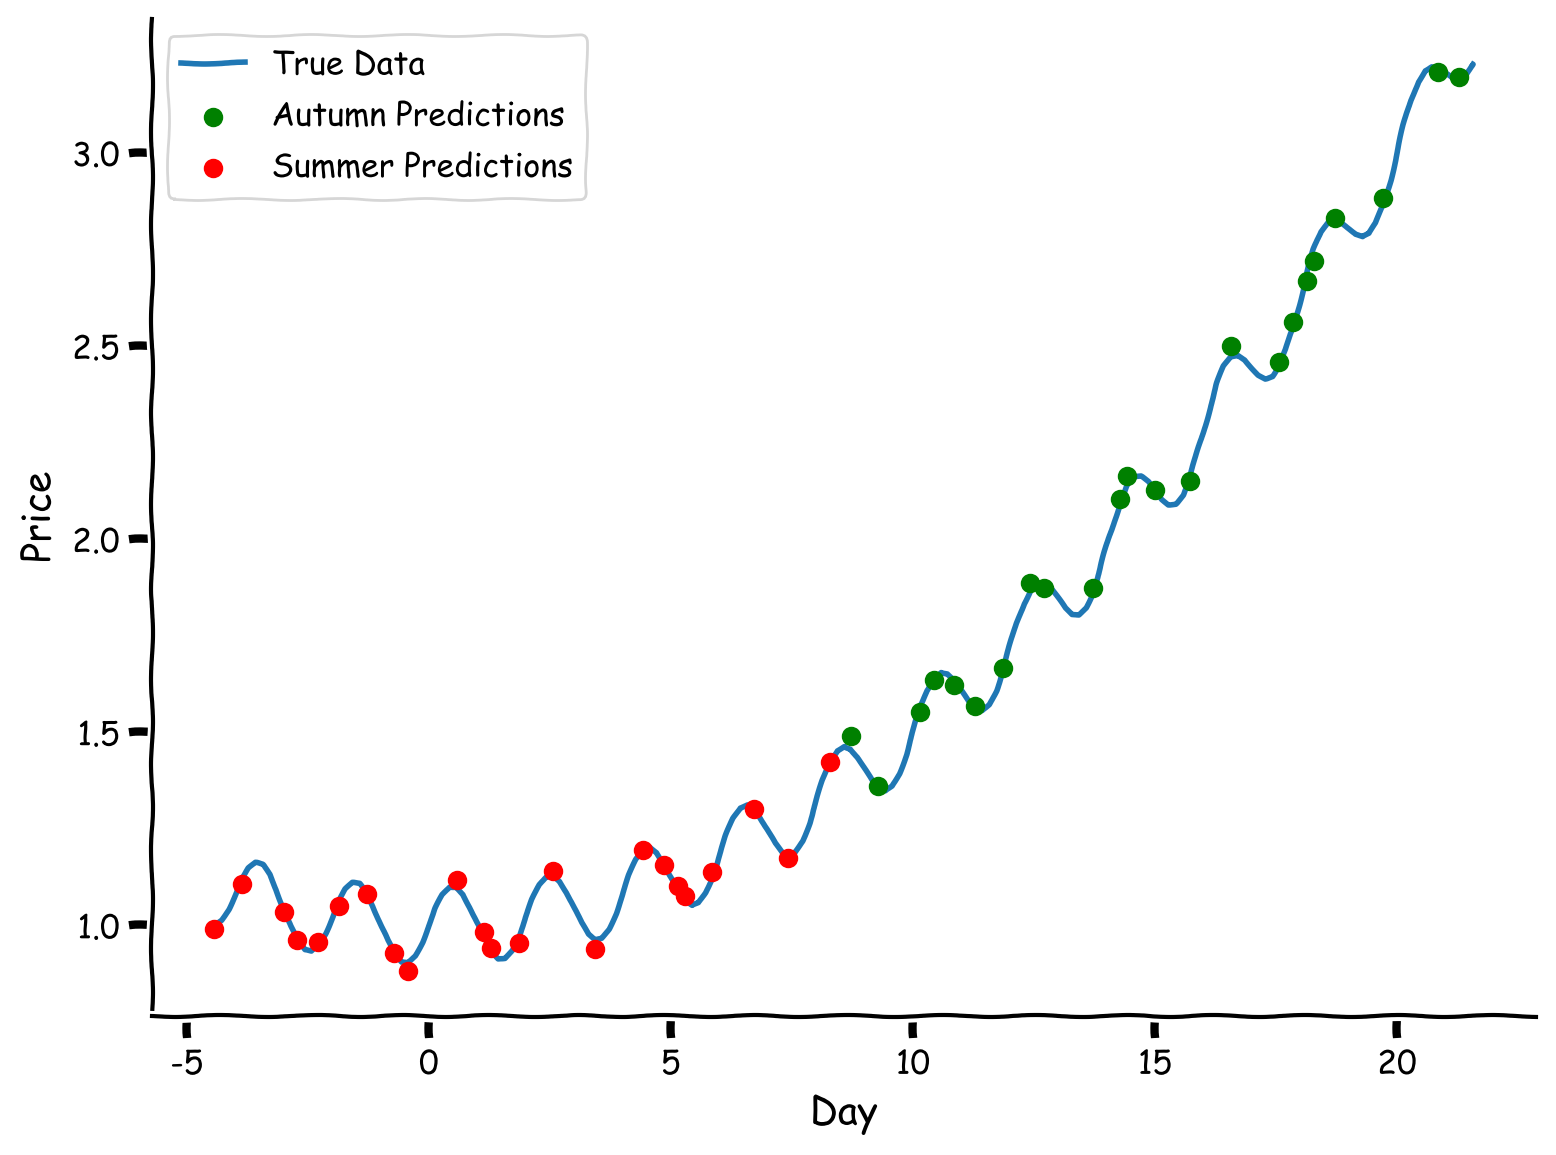

In [17]:
#predict for test sets
summer_prices_predictions = model.predict(summer_days_test_norm)
autumn_prices_predictions = model.predict(autumn_days_test_norm)

plot_summer_autumn_predictions(summer_prices_predictions, autumn_prices_predictions)

### Coding Exercise 2 Discussion

1. Observe that the number of epochs is doubled in sequential training mode vs interspersed mode. Why?
2. Which of the training schedulers worked better for this particular example? Why do you think it happened that way?

In [18]:
#to_remove explanation

"""
Discussion: Why are the epochs doubled in sequential training?

Each epoch only contains summer or autumn data and is only of size $K$, whereas interspersed training epochs contain $2K$ data points. In order to expose both models to the same amount of data, the number of epochs must be doubled.

Which mode worked better and why?

Interspersed training works better. In sequential training, the model is constantly shifting from learning one type of relation to another (which is basically what we have tried during the first section of the tutorial); still, here sequential joint training helps because we change data source for each epoch which makes the model still remember both data distributions. With interspersed this ability to remember both distributions is even stronger as both are represented in each epoch. 
""";

---
# Summary

*Estimated timing of tutorial: 25 minutes*

Have a summary of what we've learned:

1. Simply continuing to train on a new data distribution causes catastrophic forgetting

2. Joint training, wherein different datasets are interspersed to varying degrees, helps fight catastrophic forgetting. 